Atividade 3 - Leonardo Correia 

Programa de pós graduação 

In [89]:
# Ativação das bibliotecas principais.

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [109]:
#Recebimento do DataFrame (Soja_Milho)

df = pd.read_excel('soja_milho.xlsx')
df.drop(5)

,Observação,Data,Mês,Ano - Safra,Preços - Milho,Preços - Soja
0,1,02/01/2014,1,2014,26.64,72.18
1,2,03/01/2014,1,2014,27.00,71.42
2,3,06/01/2014,1,2014,27.29,71.38
3,4,07/01/2014,1,2014,27.49,70.31
4,5,08/01/2014,1,2014,27.16,70.14
...,...,...,...,...,...,...
493,494,22/12/2015,12,2015,36.23,78.61
494,495,23/12/2015,12,2015,36.26,78.21
495,496,28/12/2015,12,2015,36.29,77.59
496,497,29/12/2015,12,2015,36.55,78.55


In [92]:
#Criando o Dataset predito

vet_pred = []

for i in range(len(df['Mês'])):
    if int(df['Data'][i][6:]) ==2014 and int(df['Preços - Soja'][i])>=67:
        vet_pred.append('Colheita')
    elif int(df['Data'][i][6:]) ==2015 and int(df['Preços - Soja'][i])>=58 and int(df['Preços - Soja'][i])<=62:
        vet_pred.append('Colheita')
    else:
        vet_pred.append('Plantio')
    

In [94]:
#Criando o dataset verdadeiro
vet_true = []
for i in range(len(df['Mês'])):
    if int(df['Data'][i][3:5]) <= 5:
        vet_true.append('Colheita')
    else:
        vet_true.append('Plantio')

              precision    recall  f1-score   support

    Colheita       0.84      0.68      0.75       203
     Plantio       0.81      0.91      0.86       295

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.80       498
weighted avg       0.82      0.82      0.81       498



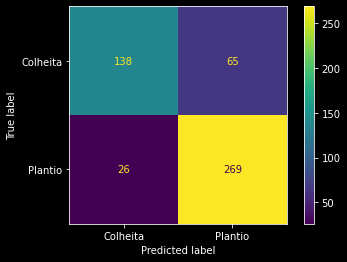

In [110]:
#Calculando as métricas de classificação 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

target_names = ['Colheita', 'Plantio']
print(classification_report(vet_true, vet_pred, target_names=target_names)) #Valores de Precição, recall e F1-Score

ConfusionMatrixDisplay.from_predictions(vet_true, vet_pred) #Determinação dos valores da Matriz de Confusão


/Users/leonardocorreia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


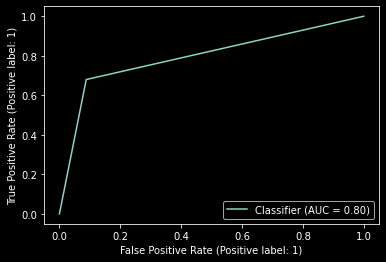

In [108]:
#Criação da Curva ROC.

from sklearn.metrics import roc_curve, auc

#Convertendo os valores Boleanos para valores numéricos 0-1
vet_true_roc = []
vet_pred_roc = []
for i in range(len(vet_true)):
    if vet_true[i] == 'Colheita':
        vet_true_roc.append(1)
    if vet_true[i] == 'Plantio':
        vet_true_roc.append(0)
    if vet_pred[i] == 'Colheita':
        vet_pred_roc.append(1)
    if vet_pred[i] == 'Plantio':
        vet_pred_roc.append(0)


from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(vet_true_roc, vet_pred_roc)